# BE noté -- Fondations statistiques du Machine Learning

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *Efficiency_Observations.csv* A l'aide de modèles de régression linéaire et de tests statistiques, nous allons alors évaluer :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

Afin de résoudre le problème, deux hypothèses seront effectuées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution des erreurs de ce modèle est supposée suivre une loi Normale centrée.


La démarche pour répondre à ces questions sera commentée dans le notebook rendu, quels qu'en soient ses résultats.


Conseil : Avant de définir une stratégie de résolution, il est recommandé de visualiser les données de *Efficiency_Observations.csv* en distinguant bien les observations obtenues dans les groupes *Brand_1* et *Brand_2*.



In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

dataframe=pandas.read_csv("./Efficiency_Observations.csv",sep=',')
brand1 = dataframe[dataframe['Brand'] == 'Brand_1']
brand2 = dataframe[dataframe['Brand'] == 'Brand_2']

# 1 - Le produit a-t-il un effet sur l'efficacité des moteurs ?

In [2]:

X = dataframe['Concentration']
y = dataframe['Efficiency']

# Ajouter une constante au modèle
X = sm.add_constant(X)

# Créer un modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Efficiency   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     288.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           3.70e-26
Time:                        13:34:00   Log-Likelihood:                -60.320
No. Observations:                  70   AIC:                             124.6
Df Residuals:                      68   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7494      0.144     12.187

On observe sur le modèle que la p-valeur est approximée à 0.000 pour la concentration, ce qui veut dire qu'elle est très faible, approximée à 0. On en déduit donc que la concentration a bien un effet statistique significatif sur l'efficacité, peu importe la marque de moteur.

# 2/3 - Les effets dépendent-ils de la marque des moteurs ? De la concentration du produit ?

In [3]:
from statsmodels.formula.api import ols

# Modèle de régression pour Brand_1
model_brand1 = ols('Efficiency ~ Concentration', data=brand1).fit()

# Modèle de régression pour Brand_2
model_brand2 = ols('Efficiency ~ Concentration', data=brand2).fit()

print("Résumé du modèle pour Brand_1:")
print(model_brand1.summary())

print("\nRésumé du modèle pour Brand_2:")
print(model_brand2.summary())

Résumé du modèle pour Brand_1:
                            OLS Regression Results                            
Dep. Variable:             Efficiency   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     664.5
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           9.06e-30
Time:                        13:34:00   Log-Likelihood:                -19.724
No. Observations:                  50   AIC:                             43.45
Df Residuals:                      48   BIC:                             47.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      

Pour Brand_1 :
Le coefficient de Concentration est de 0.4915, avec une p-value de 0.000, ce qui indique une relation significative entre la concentration et l'efficacité pour Brand_1.
Le R² ajusté est de 0.931, ce qui suggère que le modèle explique bien la variabilité de l'efficacité pour Brand_1.

Pour Brand_2 :
Le coefficient de Concentration est de 0.3090, avec une p-value de 0.000, ce qui indique également une relation significative entre la concentration et l'efficacité pour Brand_2.
Le R² ajusté est de 0.784, ce qui suggère que le modèle explique bien la variabilité de l'efficacité pour Brand_2.

Dans les deux cas, il y a une relation significative entre la concentration et l'efficacité, ce qui suggère que l'effet du produit sur l'efficacité est présent pour les deux marques de moteur. 

On remarque également que l'intervalle de confiance pour le coefficient de régression de Brand_1 à 95% est [0.453;0.530], tandis qu'il est [0.231,0.357] pour brand2 au même niveau de confiance. On en déduit donc que ces coefficients sont significativement différents, et donc que le coefficient de régression pour brand2 est inférieur à brand1, et ainsi que la concentration du produit a un effet plus bénéfique sur le moteur brand1 que sur le moteur brand2.

# BONUS : Visualiser les deux modèles

Coefficient de Brand_1: 0.4914818032677403
Coefficient de Brand_2: 0.3090175959782139


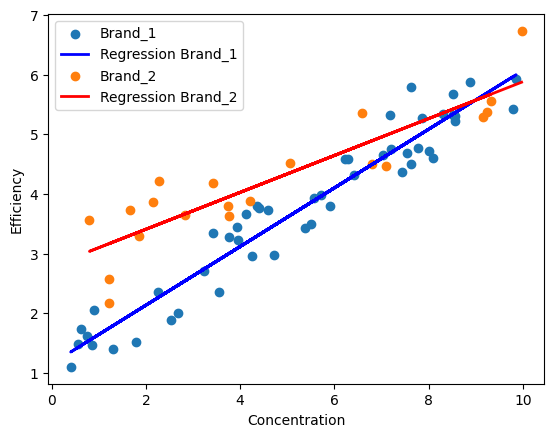

In [4]:
# Modèle de régression linéaire
model = LinearRegression()

# Ajustement et tracé pour Brand_1
X_brand1 = brand1['Concentration'].values.reshape(-1, 1)
y_brand1 = brand1['Efficiency'].values
model.fit(X_brand1, y_brand1)
coeff_brand1 = model.coef_[0]

plt.scatter(X_brand1, y_brand1, label='Brand_1')
plt.plot(X_brand1, model.predict(X_brand1), color='blue', linewidth=2, label='Regression Brand_1')

# Ajustement et tracé pour Brand_2
X_brand2 = brand2['Concentration'].values.reshape(-1, 1)
y_brand2 = brand2['Efficiency'].values
model.fit(X_brand2, y_brand2)
coeff_brand2 = model.coef_[0]

plt.scatter(X_brand2, y_brand2, label='Brand_2')
plt.plot(X_brand2, model.predict(X_brand2), color='red', linewidth=2, label='Regression Brand_2')

# Imprimer les coefficients de régression pour chaque marque de moteur
print("Coefficient de Brand_1:", coeff_brand1)
print("Coefficient de Brand_2:", coeff_brand2)

plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()
plt.show()

# Remarque

On observe ici ce que nous avions déduits plus tôt, il est d'ailleurs assez clair qu'à faible concentration (on a pas de donnée d'efficacité des moteurs à concentration nulle), le moteur Brand2 est plus efficace. Néanmoins, le produit s'avérant moins efficace sur Brand2, on voit qu'il devient moins efficace que Brand1 pour 9 unités de concentration. Cette observation est néanmoins approximative, puisque la régression, notamment pour brand2, est de qualité satisfaisante, mais pas excellente. On pourrait effectuer des test statistiques pour savoir si, pour différents niveaux de concentration, qu'on pourrait par exemple regrouper dans des classes discrètes (faible, moyenne, forte, à déterminer par exemple à l'aide d'un algorithme k-mean initialisé avec 3 groupes), l'efficacité des deux moteurs diffèrent réellement. Il est probable qu'à faible concentration, on en déduise que les deux moteurs ont une efficacité significativement différente, mais que pour concentration moyenne et haute, il soit difficile d'en tirer des conclusions statistiquement significatives. Il nous faudrait alors se procurer de nouvelles mesures afin de réduire la variance des modèles.

## Exercice 2


Nous souhaitons développer une méthode d'apprentissage automatique qui quantifie en temps réel le risque de collision d'un drone avec des objets environnants.

Pour y arriver, nous avons embarqué 18 capteurs sur un drone en phase de test et estimé à plusieurs instants son risque de collision avec un autre objet. Un total de 67 observations labellisées ont été enregistrées dans le fichier *Drone_observations.csv*.

Nous allons évaluer dans cet exercice si ces observations nous permettent de mettre en lien les données capteurs avec le niveau de risque. Nous allons aussi évaluer si nous aurions une bonne performance avec un sous-ensemble pertinent des capteurs. Chaque capteur a en effet un poids non négligeable et a besoin d'énergie pour fonctionner, ce qui a un impact sur le temps d'utilisation du drone entre deux rechargements de ses batteries.  

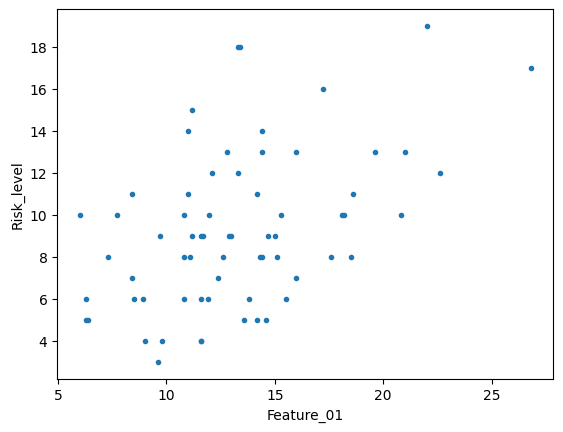

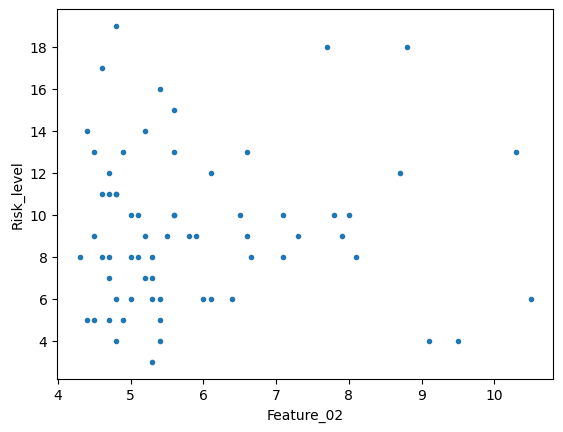

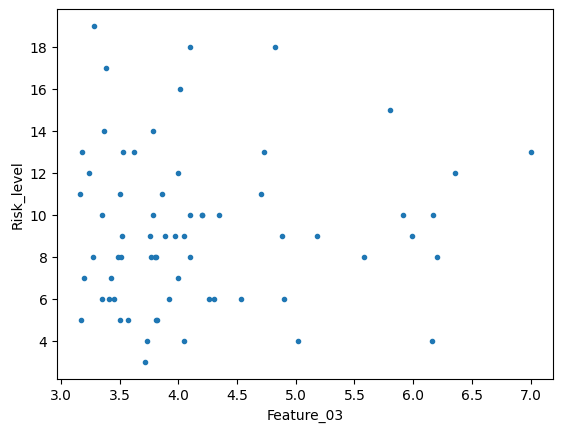

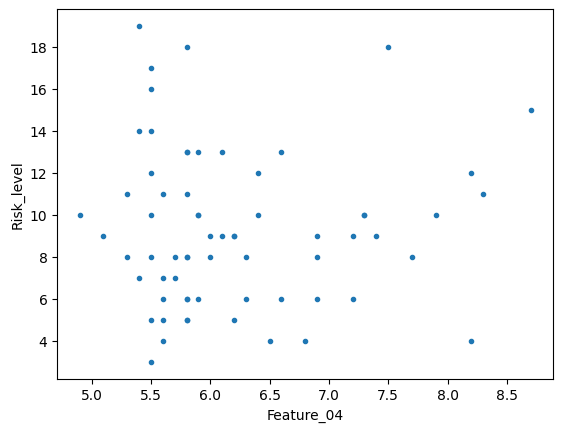

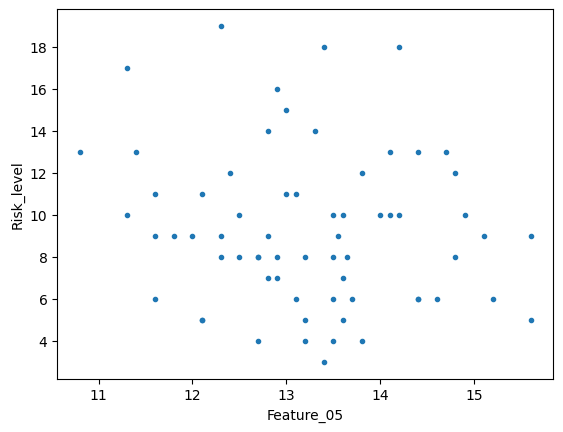

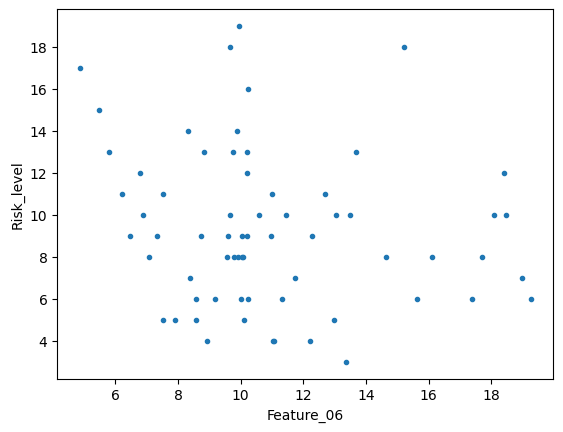

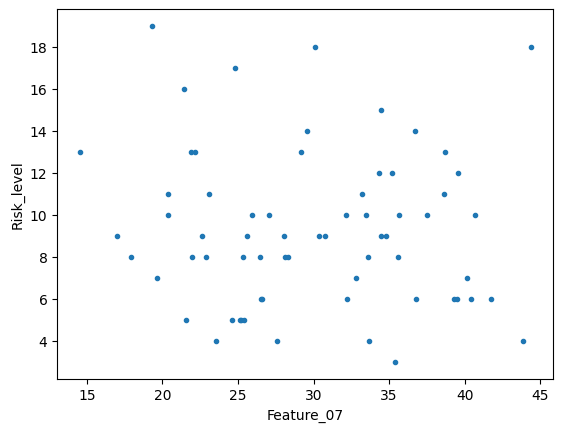

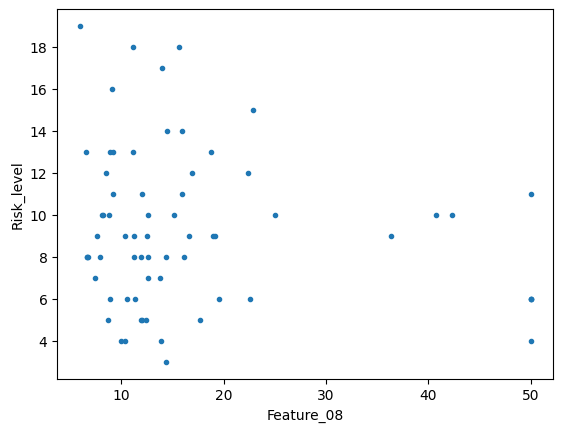

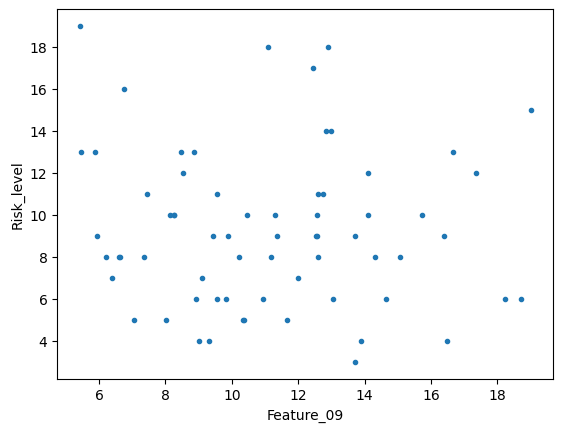

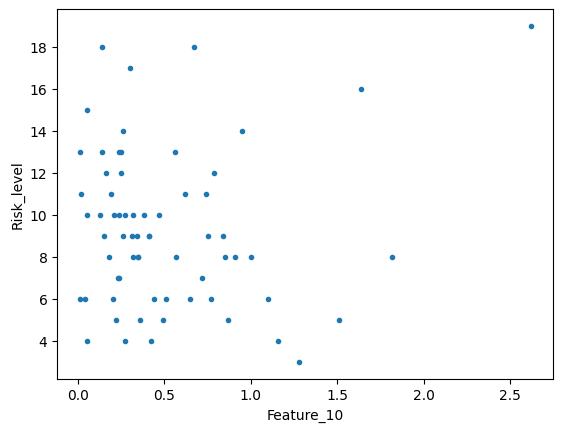

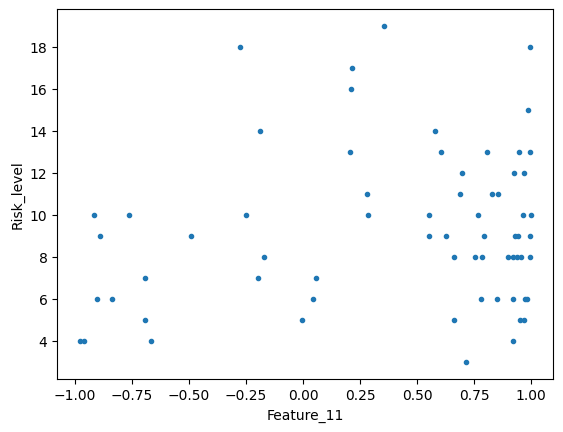

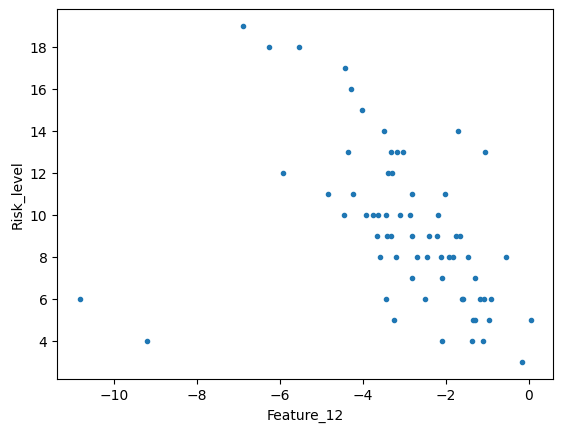

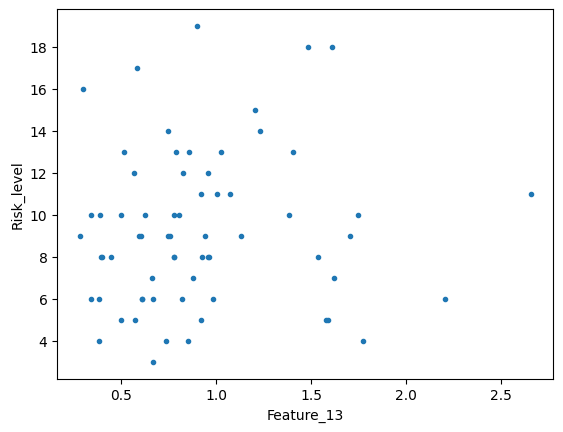

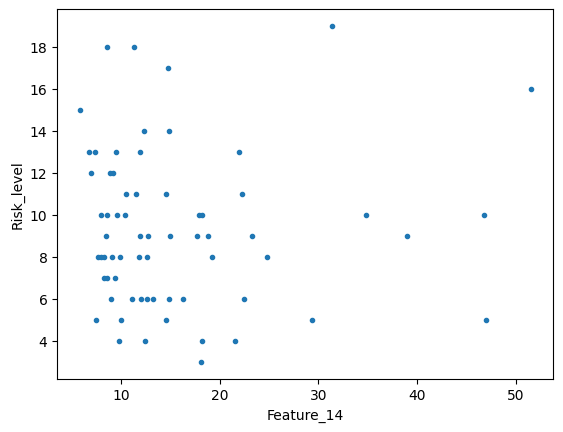

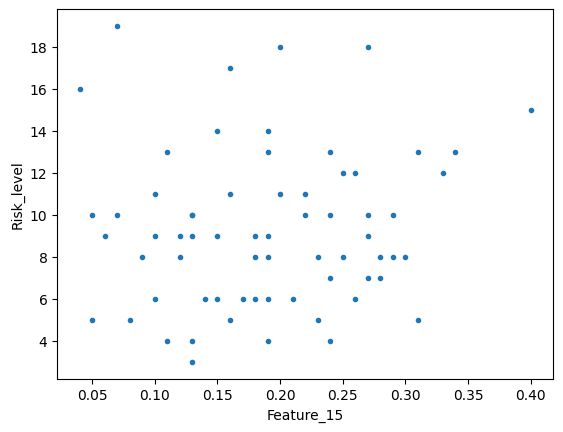

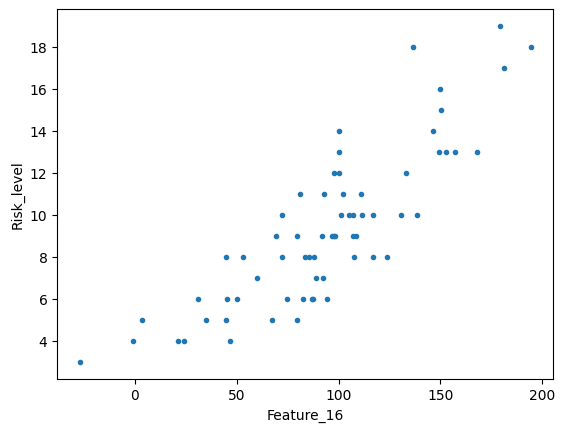

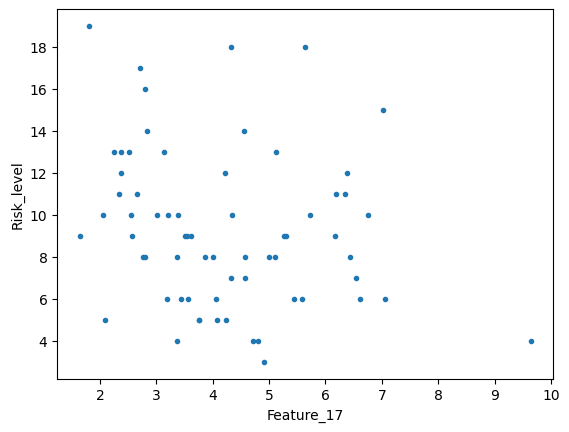

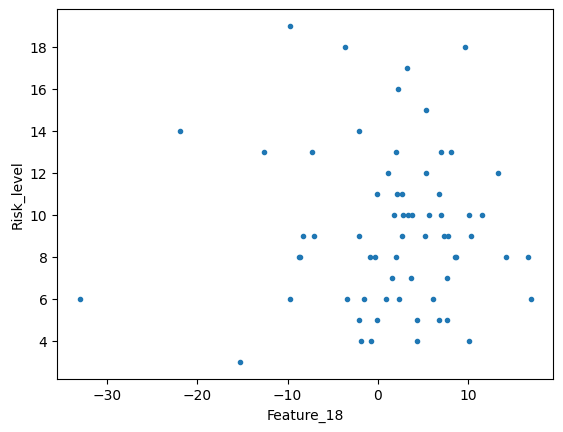

,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Risk_level
0,11.6,6.4,4.30,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6
1,15.5,10.5,4.90,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6
2,15.3,6.5,4.20,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10
3,13.4,7.7,4.10,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18
4,16.0,5.2,3.20,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,8.9,4.8,3.45,5.6,13.5,9.18,41.71,50.00,18.213333,0.01,0.9721,-1.081324,0.820,12.66,0.18,74.601643,5.44,6.14,6
62,18.2,5.1,3.78,5.9,13.5,11.44,33.50,42.34,11.293333,0.05,0.5524,-3.444640,1.384,34.88,0.07,117.049503,6.75,1.75,10
63,21.0,10.3,7.00,6.6,10.8,5.78,14.53,11.09,5.460000,0.01,0.9468,-3.034233,1.403,21.92,0.11,152.555781,2.37,1.97,13
64,11.0,4.8,3.86,5.6,13.0,7.52,20.38,9.17,7.453333,0.19,0.6871,-4.242367,1.006,11.49,0.20,111.073272,2.34,2.11,11


In [5]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing



dataframe=pandas.read_csv("./Drone_observations.csv",sep=';')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Risk_level')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()
    
dataframe



### QUESTION 2.1

Observez les données unes par unes. Identifiez-vous visuellement des liens entre certaines variables et la variable *Risk_level*. Si oui, lesquels ?



### QUESTION 2.2
On se demande si il est possible de prédire le niveau de *Risk_level* à partir d'**une seule** des variables *Feature_01*, *Feature_07* ou *Feature_16*.


#### QUESTION 2.2.1
Effectuez une regression linéaire simple entre 'Risk_level' et chacune de ces variables.  Toutes les données seront utilisées pour l'apprentissage. Evaluez alors la qualité des prédictions sur toutes les observations en mesurant l'erreur de prédiction au carré moyenne (MSE). Quel est le risque potentiel en mesurant la qualité des prédictions sur le jeu d'apprentissage ?

#### QUESTION 2.2.2
En utilisant une méthode de validation croisée de type 4-folds, pouvez-vous dire laquelle de ces trois variables semble être la plus fiable pour prédire le risque à l'aide d'un modèle linéaire ?


#### QUESTION 2.2.3
Peut-on statistiquement affirmer qu'il existe une relation significative entre *Risk_level* et (indépendament) *Feature_01*, *Feature_07* ou bien *Feature_16* ? Si oui, décrivez votre procédure de test.


# 2.1

Il semble y avoir un lien avec la Feature_12 et la la Feature_16, dans une moindre mesure (mais à prendre avec des pincettes car très approximatif) avec la Feature_14 et la Feature_01, la Feature_07 ou la Feature_18



# 2.2.1

On risque le surapprentissage si on ne divise pas notre échantillon en train_set et test_set, car on aura un biais d'optimisme dû au fait que nous faisons la régression uniquement sur des données déjà connues. 

Variable : Feature_01
Coefficient de régression (pente) : 0.4203450401856768
Intercept : 3.7186254486308314
MSE : 10.480923895867484


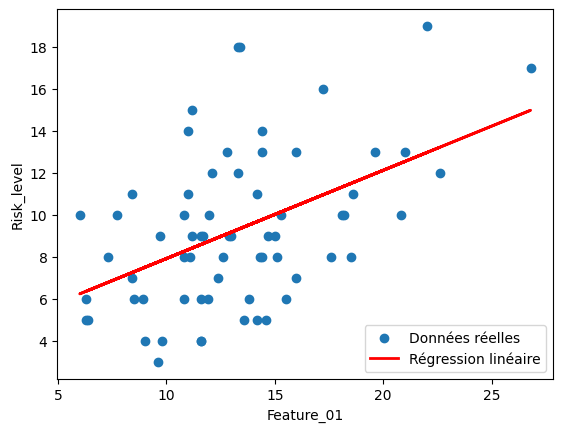

Variable : Feature_07
Coefficient de régression (pente) : -0.03446815276220392
Intercept : 10.31650247035594
MSE : 13.506926344682194


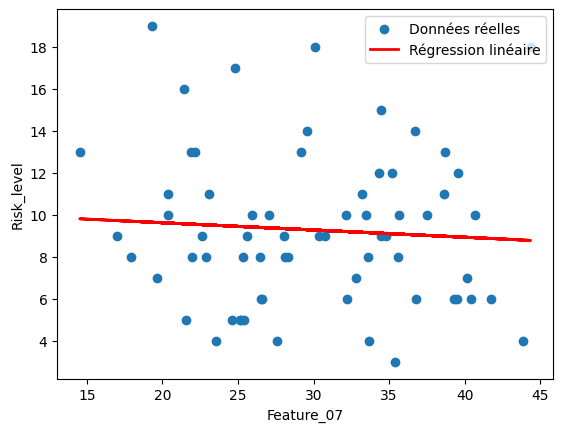

Variable : Feature_16
Coefficient de régression (pente) : 0.07088966912622757
Intercept : 2.6512855334063534
MSE : 3.833346710573031


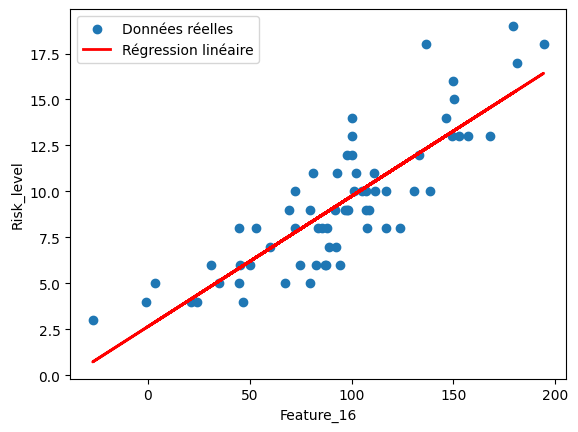

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Charger le DataFrame
dataframe = pd.read_csv("./Drone_observations.csv", sep=';')

# Liste des noms de colonnes des variables d'intérêt
features = ['Feature_01', 'Feature_07', 'Feature_16']

# Créer un dictionnaire pour stocker les MSE
mse_results = {}

# Boucle à travers chaque variable et effectue une régression linéaire
for feature_name in features:
    # Sélectionner les données de la variable et 'Risk_level'
    X = dataframe[feature_name].values.reshape(-1, 1)
    y = dataframe['Risk_level'].values

    # Créer un modèle de régression linéaire
    model = LinearRegression()

    # Ajuster le modèle aux données
    model.fit(X, y)

    # Faire des prédictions sur les données d'entraînement
    predictions = model.predict(X)
    
    # Calculer la MSE
    mse = mean_squared_error(y, predictions)

    # Stocker la MSE dans le dictionnaire
    mse_results[feature_name] = mse

    # Afficher le coefficient de régression et l'intercept
    print("Variable :", feature_name)
    print("Coefficient de régression (pente) :", model.coef_[0])
    print("Intercept :", model.intercept_)
    print("MSE :", mse)

    # Afficher le graphique de la régression linéaire
    plt.scatter(X, y, label='Données réelles')
    plt.plot(X, predictions, color='red', linewidth=2, label='Régression linéaire')
    plt.xlabel(feature_name)
    plt.ylabel('Risk_level')
    plt.legend()
    plt.show()
    


# 2.2.2

On voit ici que la feature présentant la MSE la plus faible est la Feature_16 : c'est aussi celle que nous avions visuellement identifiée comme la plus corrélée au risk_level.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Séparation X et Y
X = dataframe[['Feature_16', 'Feature_01', 'Feature_07']].values
Y = dataframe['Risk_level'].values

n_folds = 4

# Initialisez la liste pour stocker les résultats des MSE
mse_results = []

# Objet KFold pour la validation croisée
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for col in range(X.shape[1]):
    mse_fold = 0
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        
        # Modèle linéaire
        model = LinearRegression()
        model.fit(X_train[:, col].reshape(-1, 1), Y_train)
        
        # Prédictions
        Y_pred = model.predict(X_test[:, col].reshape(-1, 1))
        
        # MSE
        mse_fold += mean_squared_error(Y_test, Y_pred)
    
    # Moyenne des MSE
    mse_avg = mse_fold / n_folds
    
    mse_results.append((dataframe.columns[[15, 0, 6][col]], mse_avg))

# Tri des résultats par MSE croissante
mse_results.sort(key=lambda x: x[1])

# Affichage
for var, mse in mse_results:
    print(f"Variable : {var}, MSE : {mse}")

# Sélectionnez la variable avec le MSE le plus bas
best_variable = mse_results[0][0]
print(f"La variable la plus fiable pour prédire le risque est : {best_variable}")
X

Variable : Feature_16, MSE : 4.225132903770053
Variable : Feature_01, MSE : 11.914810670509322
Variable : Feature_07, MSE : 15.294040641224537
La variable la plus fiable pour prédire le risque est : Feature_16


array([[ 94.28505348,  11.6       ,  39.32      ],
       [ 86.76652679,  15.5       ,  36.78      ],
       [107.33614717,  15.3       ,  25.9       ],
       [136.5163841 ,  13.4       ,  44.36      ],
       [ 88.77446865,  16.        ,  19.62      ],
       [ 97.84092934,  12.1       ,  34.34      ],
       [123.57043476,   7.3       ,  35.57      ],
       [ 83.7060141 ,  14.4       ,  26.43      ],
       [ 72.13161344,  10.8       ,  32.16      ],
       [  3.48323347,  14.6       ,  21.56      ],
       [ 92.51846152,  12.4       ,  40.15      ],
       [ 81.01847213,  14.2       ,  33.22      ],
       [130.7130286 ,  20.8       ,  35.68      ],
       [168.09656422,  12.8       ,  38.67      ],
       [100.08704314,  22.6       ,  39.53      ],
       [149.20527787,  19.6       ,  29.17      ],
       [ 87.48460741,   8.5       ,  26.57      ],
       [ 72.01027385,  10.8       ,  28.3       ],
       [ 45.37651067,  11.9       ,  40.4       ],
       [146.39582962,  11.     

# 2.2.3

In [32]:
import statsmodels.api as sm

# Séparation X et Y
X = dataframe[['Feature_01', 'Feature_07', 'Feature_16']]
Y = dataframe['Risk_level']

# Niveau de signification alpha (seuil de p-valeur)
alpha = 0.05

for feature_name in X.columns:
    X_feature = sm.add_constant(X[feature_name])

    # Modèle de régression linéaire
    model = sm.OLS(Y, X_feature).fit()

    # Extrait la p-valeur associée à la caractéristique
    p_value = model.pvalues[feature_name]

    print(f"Caractéristique : {feature_name}")
    print(f"P-valeur : {p_value}")

    if p_value < alpha:
        print("La caractéristique est statistiquement significative.")
    else:
        print("La caractéristique n'est pas statistiquement significative.")


Caractéristique : Feature_01
P-valeur : 5.1305027837325785e-05
La caractéristique est statistiquement significative.
Caractéristique : Feature_07
P-valeur : 0.5905492065328961
La caractéristique n'est pas statistiquement significative.
Caractéristique : Feature_16
P-valeur : 3.1624860150064763e-19
La caractéristique est statistiquement significative.


1 - Hypothèse nulle (H0) : Il n'y a pas de relation significative entre Risk_level et la variable en question 
Hypothèse alternative (H1) : Il existe une relation significative entre Risk_level et la variable en question
On effectue ensuite un test statistique 

2- On utilise la régression linéaire pour estimer les coefficients de régression et leurs écarts-types pour chaque variable. 

3 - On observe ensuite la p-value de ces différents tests


### QUESTION 2.3
On s'intéresse maintenant au lien entre les variables *Risk_level* et *Feature_12*. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

Définissez une procédure pour détecter automatiquement les deux données aberrantes dans un jeu de données. Cette procédure fera l'hypothèse que 10\% des observations peuvent ne pas être fiables.

#### QUESTION 2.3.2

Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur la variable *Feature_12*. Comment auriez-vous traité ces observations si vous aviez voulu préserver l'information qu'elles contiennent dans les autres variables ?


# 2.3.1

In [36]:
import numpy as np

variable = dataframe['Feature_12']

# Calcul de la médiane de la variable
median = np.median(variable)

# Calcul de l'écart à la médiane (MAD)
mad = np.abs(variable - median)

# Calcul du score Z
constant = 1.4826
z_scores = mad / (constant * mad.median())

#On a fait l'hypothèse que 10% des observations peuvent ne pas être fiables
#On aurait aussi pu tuner le treshold à la main, en itérant pour que len(outliers)=2 (ici, à l'oeil sur le graphique, on en détecte 2)
threshold = np.percentile(z_scores, 90)

# On identifie les données aberrantes
outliers = variable[z_scores > threshold]

#On les trie
sorted_outliers = outliers.sort_values(ascending=True)

#On prend les 2 plus gros outliers
top_outliers = sorted_outliers[0:2]

# Affichage
print("Données aberrantes détectées :")
print(top_outliers)

Données aberrantes détectées :
29   -10.828537
49    -9.210272
Name: Feature_12, dtype: float64



1- On calcule, pour chaque variable, sa médiane

2- On calcule pour chaque observation l'écart absolu entre la valeur de la variable et sa médiane

3- Pour chaque observation, on calcule le score Z en divisant l'écart à la médiane par le produite d'une constante avec l'écart médian. On utilise la valeur usuelle 1.486 pour la constante, qui correspond à une constante pour une distribution normale. 

4 - On définit un seuil pour les scores de Z. On considère que 10% des valeurs sont potentiellement aberrantes. Ici toutefois on en observe 2 en particulier, donc on ne va garder que les 2 plus grands outliers de la liste.

5 - On print les observations dont les scores Z dépassent le seuil de valeur aberrante fixé. 

# 2.3.2

Plusieurs possibilités (en fonction du sens de la question?) : 

1) On pourrait construire une matrice des indicatrices des outliers, et la multiplier par la matrice identité * la moyenne ou la médiane afin de faire en sorte de "ramener" les outliers dans une plage acceptable pour le modèle. 

2) On pourrait supprimer ces outliers dans un premier temps, faire une régression, et remplacer les y par les y_pred

3) On pourrait tout simplement garder ces outliers, et faire attention à bien développer un modèle robuste aux outliers 


### QUESTION 2.4

Parmis les 18 variables observées, on souhaite maintenant sélectionner automatiquement celles qui nous permettraient de prédire au mieux *Risk_level* à l'aide de la régression multiple avec un terme de régularisation. Décrivez votre démarche et vos résultats. En particulier, le compromis à trouver entre nombre de variables sélectionnées et qualité de prédiction pourra être discuté.



In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, make_scorer

X = dataframe.drop(columns=["Risk_level"])
Y = dataframe["Risk_level"]

# Normalisation des variables explicatives
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Division test/train
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Modèle de régression LassoCV avec validation croisée
alphas = np.logspace(-12, 6, 100)  
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Ajuster le modèle aux données d'apprentissage
lasso_cv.fit(X_train, Y_train)

# Meilleur alpha sélectionné par validation croisée
best_alpha = lasso_cv.alpha_
print("Meilleur alpha sélectionné par validation croisée :", best_alpha)

# Variables sélectionnées avec des coefficients non nuls
selected_features = X.columns[lasso_cv.coef_ != 0]
print("Variables sélectionnées :", selected_features)

# Évaluer la performance du modèle sur l'ensemble de test
Y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne (MSE) sur l'ensemble de test :", mse)

Meilleur alpha sélectionné par validation croisée : 0.6579332246575682
Variables sélectionnées : Index(['Feature_01', 'Feature_12', 'Feature_16'], dtype='object')
Erreur quadratique moyenne (MSE) sur l'ensemble de test : 3.6336155932142495


Le compromis entre le nombre de variables sélectionnées et la qualité de la prédiction est typique de la régression Lasso. En ajustant le paramètre de régularisation (alpha), on peut contrôler le nombre de variables sélectionnées. Un alpha plus élevé favorise la régularisation, ce qui entraîne plus de coefficients de régression nuls et moins de variables sélectionnées. Un alpha plus faible permet plus de flexibilité, mais peut conduire à la sélection de variables non pertinentes.

On peut explorer différentes valeurs d'alpha pour trouver le compromis optimal entre un modèle simple avec un petit nombre de variables explicatives et un modèle plus complexe avec une meilleure adéquation aux données. Le choix dépendra de la priorité entre la simplicité et la performance du modèle dans notre contexte d'application.